In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno # display missing data

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments
%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib Version : 3.4.3
Seaborn Version : 0.11.2
/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Coloumn Description

* **Suburb** - Suburb

* **Address** - Address

* **Rooms** - Number of rooms

* **Price** - Price in Australian dollars

**Method** - 
    
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

**Type** -

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

* **SellerG** - Real Estate Agent

* **Date** - Date sold

* **Distance** - Distance from CBD in Kilometres

* **Regionname** - General Region (West, North West, North, North east …etc)

* **Propertycount** - Number of properties that exist in the suburb.

* **Bedroom2** - Scraped # of Bedrooms (from different source)

* **Bathroom** - Number of Bathrooms

* **Car** - Number of carspots

* **Landsize** - Land Size in Metres

* **BuildingArea** - Building Size in Metres

* **YearBuilt** - Year the house was built

* **CouncilArea** - Governing council for the area

* **Lattitude** - Self explanitory

* **Longtitude** - Self explanitory

The objects of this notebook:

1. Defien Queistions
2. Understand Data
3. Pre-processing
4. Visualisation
5. Clustering
6. Linear Regression

# 1. Define Quetions

Clustering

Linear Regression

# 2. Understand Data

* **Number of rows/entries** - 34857 entries, 0 to 34856

* **Data columns** (total 21 columns):

*   **Numerical** (13 columns)
 *    float64 (12 columns) - 
    'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
    'Propertycount'

 *    int64 (1 column) - 'Rooms'

* **Nominal/Categorical** (8 columns)
 *     object (8 columns) - 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
 

### Which features could higly be relative to Price?

Inference - Distance, Landsize, BuildingArea, YearBuilt, Rooms


In [12]:
# show the current working directory
%pwd 

'/kaggle/working'

In [13]:
# ???
%ls kaggle/working/

ls: cannot access 'kaggle/working/': No such file or directory


In [157]:
df = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.shape # 34857 rows, 21 columns

(34857, 21)

In [15]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [16]:
# Statistical Summary
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [17]:
# Summary of object features
# df.describe(include = 'object')
df.describe(include = [np.object])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [18]:
len(set(df['Suburb']))

351

In [19]:
# SELECT h FROM Type
df_type_h = df.loc[df['Type'] == 'h']
df_type_h.shape # 23980, 21

(23980, 21)

In [20]:
# the number of values that each unique value has
df['Type'].value_counts()
df['Price'].value_counts().head(10)

1100000.0    235
600000.0     235
650000.0     219
800000.0     217
1300000.0    210
1000000.0    205
1200000.0    204
700000.0     197
750000.0     194
900000.0     191
Name: Price, dtype: int64

There are not many empty values in **categorical features**, but there are a lot of empty values in **numerical features**.

In [21]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionnam

<AxesSubplot:>

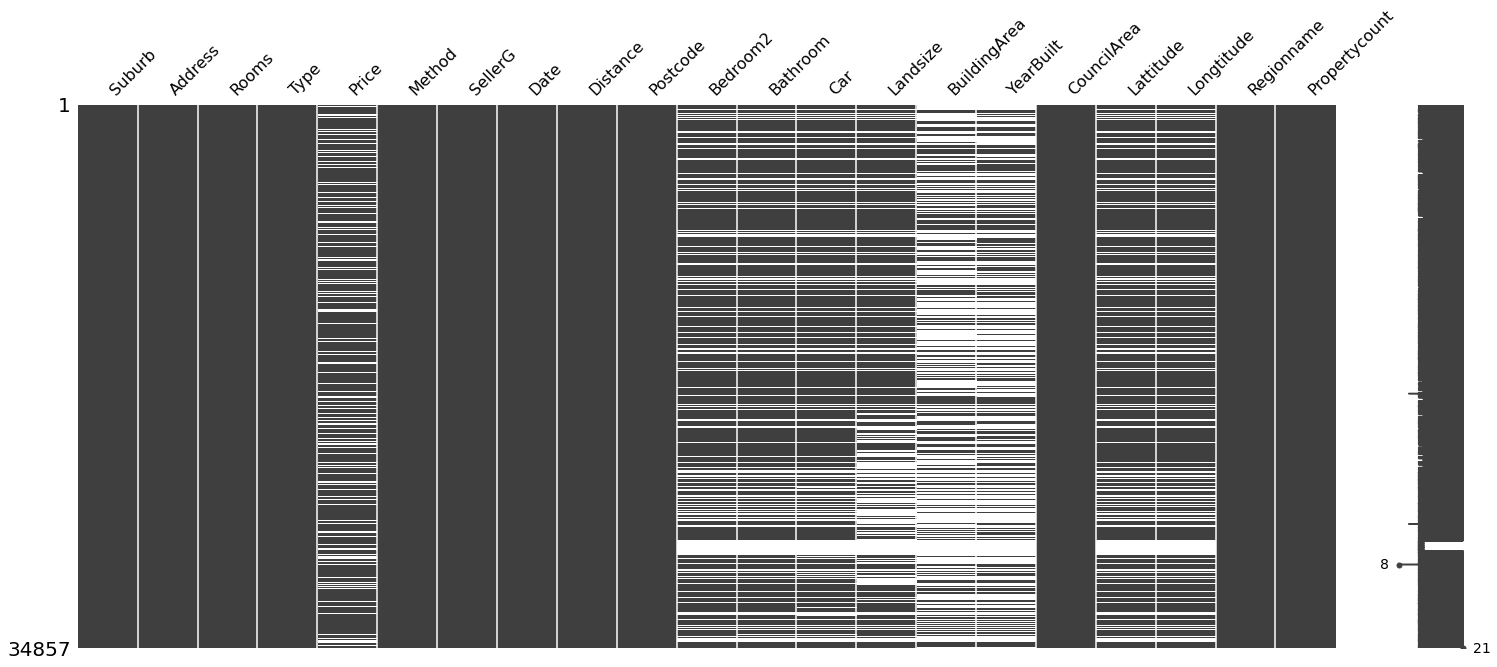

In [22]:
msno.matrix(df)

# 3. Pre-processing

* Drop unnecessary columns
* Remove/Fill missing values
* One hot encoding



In [23]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Unncessary features? - Car, Address, SellerG, Postcode, Lattitude, Longitude, Propertycount

In [7]:
# Change the type of data
df['YearBuilt'].astype(str).str[:4]

0         nan
1         nan
2        1900
3         nan
4        1900
         ... 
34852     nan
34853    2018
34854    2000
34855     nan
34856    1930
Name: YearBuilt, Length: 34857, dtype: object

In [8]:
# Change BuiltYear's type of data from float into object
df['YearBuilt'].fillna(0, inplace = True)
df['YearBuilt'].astype(int)
df['YearBuilt'].replace(0, 'nan', inplace = True) # data changed into object type
df['YearBuilt'] # object

# Change into float64 or int64 
pd.to_numeric(df['YearBuilt'], errors='coerce') # coerce -> change empty values to NaN
df['YearBuilt']

0           nan
1           nan
2        1900.0
3           nan
4        1900.0
          ...  
34852       nan
34853    2018.0
34854    2000.0
34855       nan
34856    1930.0
Name: YearBuilt, Length: 34857, dtype: object

In [ ]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

In [158]:
# Address, SellerG, Postcode, Lattitude, Longtitud
# df.dropna(axis = 0, subset = )
df = df.drop(columns = ['Address', 'Car', 'SellerG', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], axis = 1)
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,Abbotsford,2,h,NaN,SS,3/09/2016,2.5,2.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,3,u,NaN,VB,4/02/2016,2.5,3.0,2.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [159]:
df = df.dropna(axis = 0, subset = ['Price', 'BuildingArea', 'YearBuilt'])
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan
11,Abbotsford,3,h,1876000.0,S,7/05/2016,2.5,4.0,2.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan
14,Abbotsford,2,h,1636000.0,S,8/10/2016,2.5,2.0,1.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan


In [169]:
df['Landsize'].fillna(round(df['Landsize'].mean()), inplace = True)

                 Rooms     Price  Distance  Bedroom2  Bathroom  Landsize  \
Rooms         1.000000  0.467272  0.273380  0.968160  0.628007  0.095143   
Price         0.467272  1.000000 -0.248651  0.454604  0.457579  0.054220   
Distance      0.273380 -0.248651  1.000000  0.279479  0.130204  0.124695   
Bedroom2      0.968160  0.454604  0.279479  1.000000  0.630330  0.095013   
Bathroom      0.628007  0.457579  0.130204  0.630330  1.000000  0.071589   
Landsize      0.095143  0.054220  0.124695  0.095013  0.071589  1.000000   
BuildingArea  0.613948  0.502704  0.139320  0.603837  0.564198  0.078429   
YearBuilt     0.021726 -0.320318  0.333204  0.030515  0.203236  0.036381   

              BuildingArea  YearBuilt  
Rooms             0.613948   0.021726  
Price             0.502704  -0.320318  
Distance          0.139320   0.333204  
Bedroom2          0.603837   0.030515  
Bathroom          0.564198   0.203236  
Landsize          0.078429   0.036381  
BuildingArea      1.000000   0.0729

<AxesSubplot:>

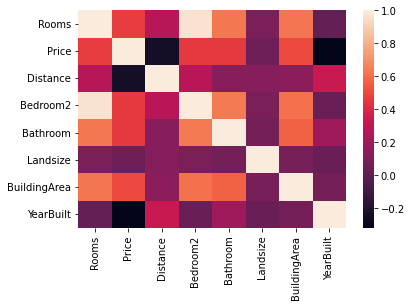

In [170]:
print(df.corr())
sns.heatmap(df.corr())

In [171]:
len(df) # 10249

10249

In [63]:
# What is the missing value...

len(df['Car']) # 10656
df['Car'].value_counts().sum() # 10479 + 177 = 10656
print(sum(df['Car'] == 'NaT')) # 0
print(sum(df['Car'] == 'NaN')) # 0
print(sum(df['Car'] == 'nan')) # 0
print(sum(df['Car'] == 'None')) # 0
print(sum(df['Car'] == '')) # 0
print(sum(df['Car'] == 'NA')) # 0
print(sum(df['Car'] == 'Na')) # 0
print(sum(df['Car'] == 'na')) # 0
print(sum(df['Car'] == 0.0)) # 
print(sum(df['Car'] == '0.0')) # 0
print(sum(df['Car'] == None)) # 0
print(sum(df['Car'] == np.NaN)) # 0
print(sum(df['Car'] == pd.NA)) # 0
print(sum(df['Car'] == np.nan))# 0

0
0
0
0
0
0
0
0
611
0
0
0
0
0


In [49]:
df['Car'].isna().sum() #177 --> default 0.0?

177

In [77]:
df['Car'].isna().tail(20) 

34788     True
34789    False
34790    False
34791    False
34804    False
34807    False
34819    False
34820    False
34823    False
34826    False
34828    False
34831    False
34836    False
34837    False
34842     True
34847    False
34849    False
34853    False
34854    False
34856    False
Name: Car, dtype: bool

In [83]:
pd.set_option('display.max_rows', 50)

### Categorical Features

In [177]:
# Columns that are object
cat_cols = df.select_dtypes(include = ['object'])
cat_cols.head()

,Suburb,Type,Method,Date,CouncilArea,Regionname
2,Abbotsford,h,S,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,h,VB,4/06/2016,Yarra City Council,Northern Metropolitan
11,Abbotsford,h,S,7/05/2016,Yarra City Council,Northern Metropolitan
14,Abbotsford,h,S,8/10/2016,Yarra City Council,Northern Metropolitan


### Numerical Features


In [178]:
# Columns that are not object
num_cols = df.select_dtypes(exclude = ['object'])
num_cols.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt
2,2,1035000.0,2.5,2.0,1.0,156.0,79.0,1900.0
4,3,1465000.0,2.5,3.0,2.0,134.0,150.0,1900.0
6,4,1600000.0,2.5,3.0,1.0,120.0,142.0,2014.0
11,3,1876000.0,2.5,4.0,2.0,245.0,210.0,1910.0
14,2,1636000.0,2.5,2.0,1.0,256.0,107.0,1890.0


# Visualisation

Set dpi (Dots per Inch) as the default resolution of matplotlib is low

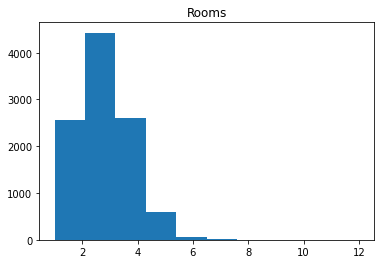

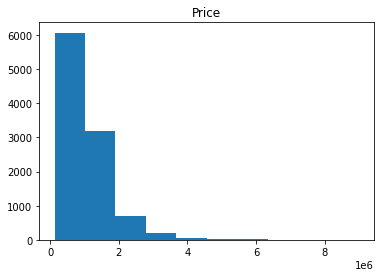

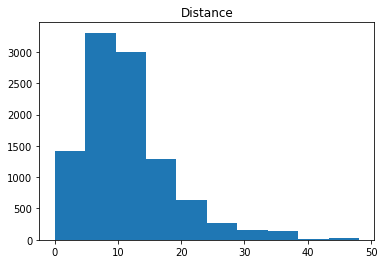

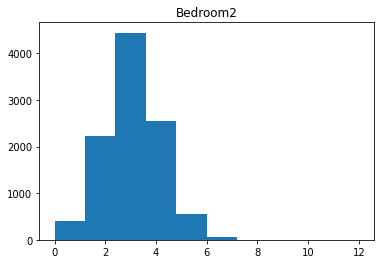

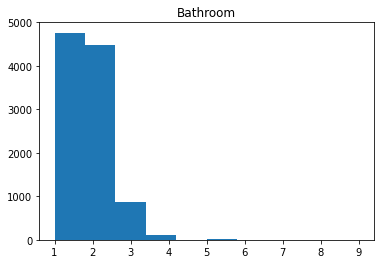

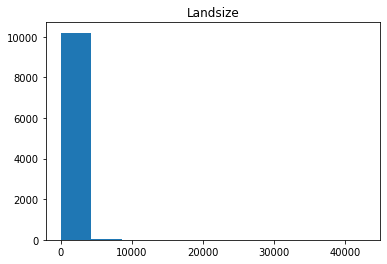

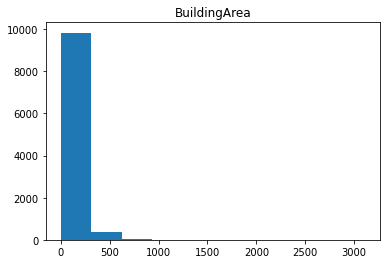

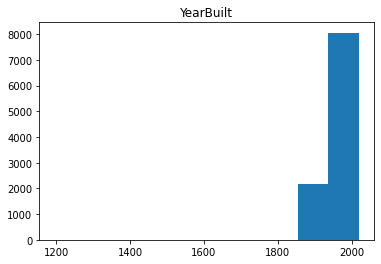

In [184]:
for i in num_cols:
    plt.hist(num_cols[i])
    plt.title(i)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


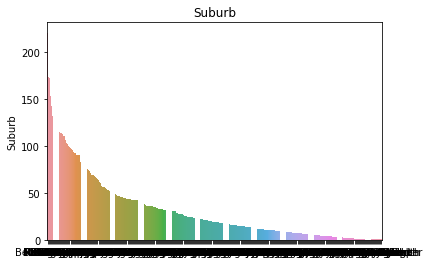

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


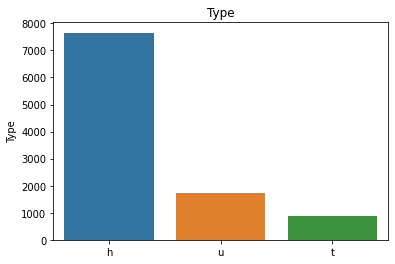

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


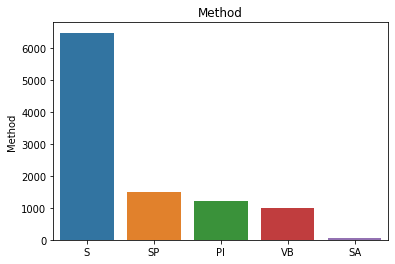

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


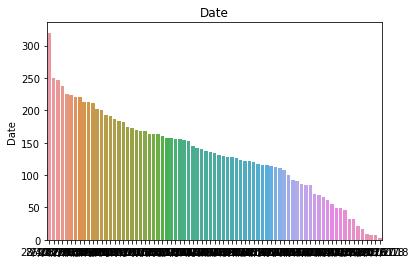

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


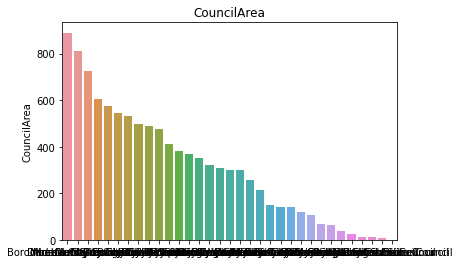

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


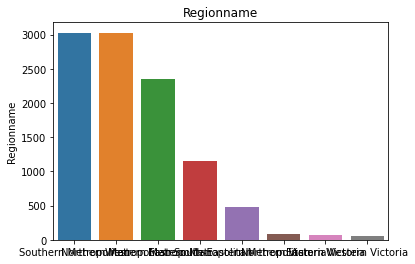

In [185]:
for i in cat_cols:
    sns.barplot(cat_cols[i].value_counts().index, cat_cols[i].value_counts()).set_title(i)
    plt.show()

In [248]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')

In [272]:
# df_converted = df

# for col_name in df_converted:
#     if(df_converted[col_name].dtype == 'object'):
#         df_converted[col_name] = df_converted[col_name].astype('category')
#         df_converted[col_name] = df_converted[col_name].cat.codes
df['cat_regionname'] = df['Regionname'].astype('category').cat.codes
df[['cat_regionname', 'Regionname']].value_counts()

cat_regionname  Regionname                
5               Southern Metropolitan         3028
2               Northern Metropolitan         3023
6               Western Metropolitan          2347
0               Eastern Metropolitan          1153
4               South-Eastern Metropolitan     485
3               Northern Victoria               86
1               Eastern Victoria                69
7               Western Victoria                58
dtype: int64

In [ ]:
# normal distribution?
# positive/right skwness - outliers lying on the right side

# sns.distplot(df['Price']) # distplot - displot or histplot
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', useOffset=False)
# plt.ticklabel_format(style='plain', axis='x',useOffset=False)

In [ ]:
sns.displot(df['Price'])
plt.ticklabel_format(style='plain', useOffset=False)

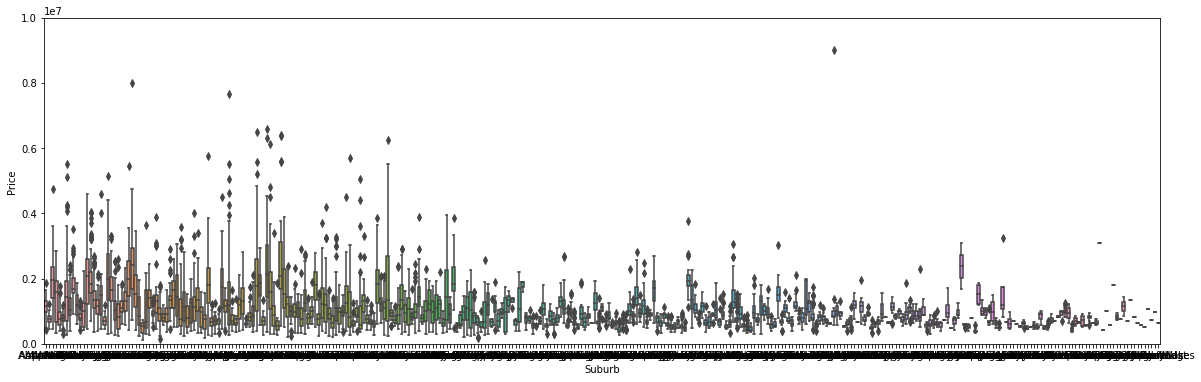

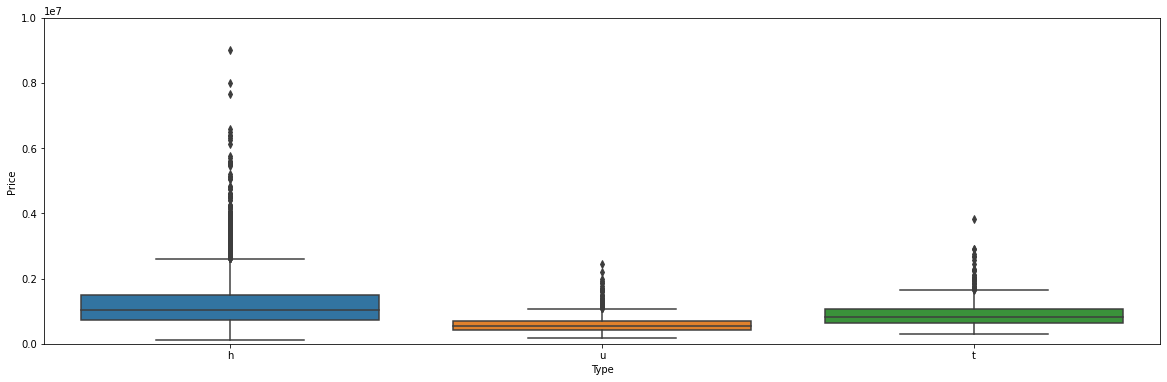

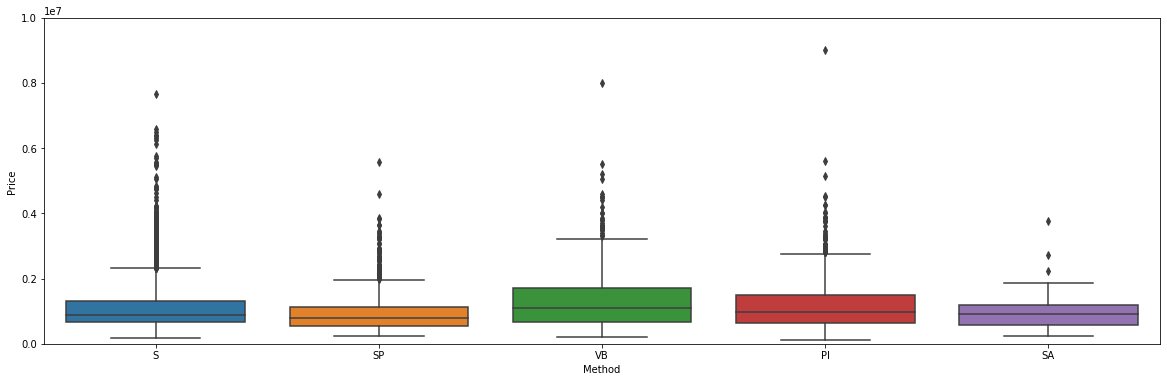

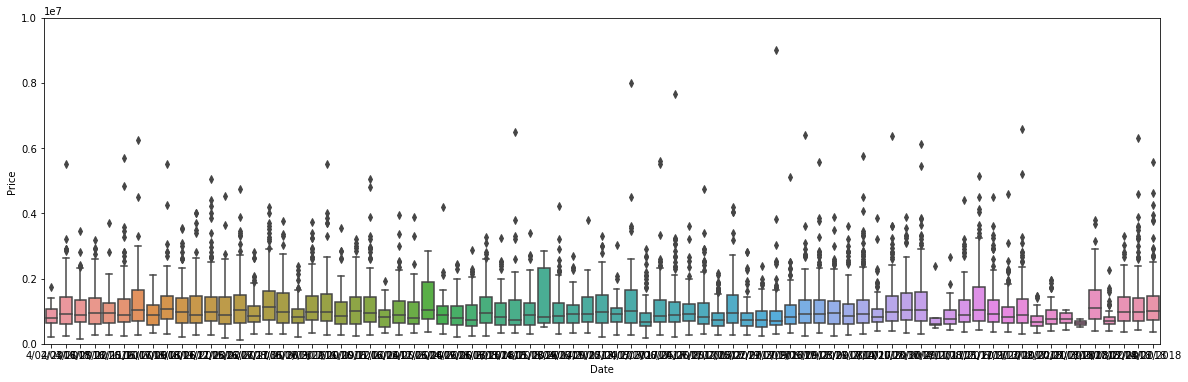

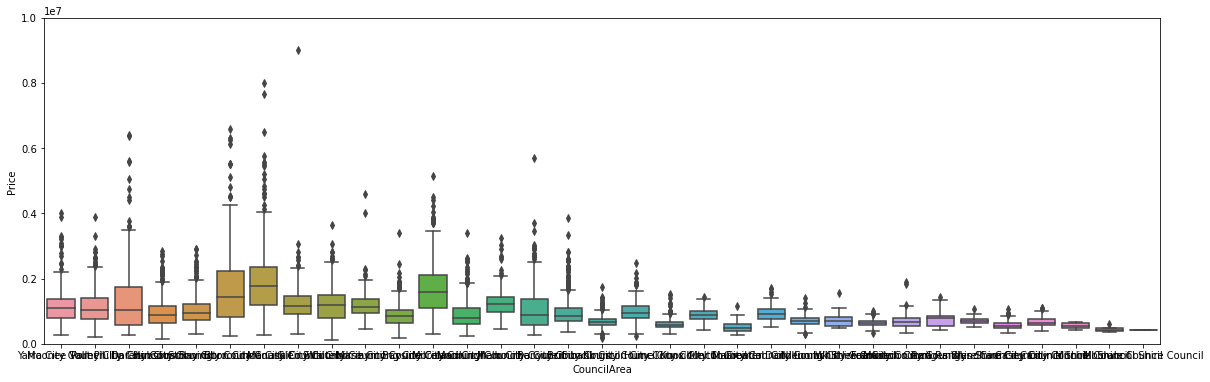

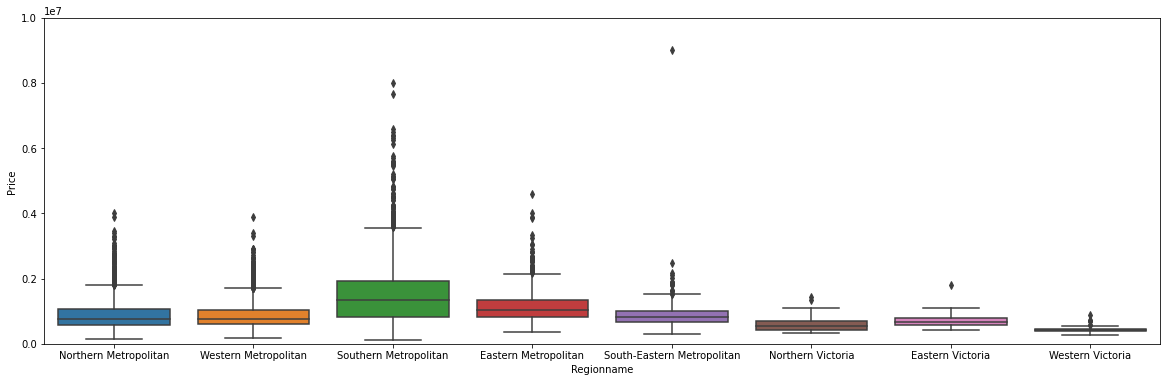

In [186]:
# Price and categorical features with box plots
var = cat_cols.copy()
feature = 'Price'

for i in cat_cols:
    data = pd.concat([df[feature], df[i]], axis=1)
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=i, y=feature, data=data)
    fig.axis(ymin=0, ymax=10000000);


In [ ]:
# Price and numerical features with scatter plots
var = num_cols.copy()

for i in num_cols:
    data = pd.concat([df[var_a], df[i]], axis = 1)
    data.plot.scatter(x = var_a, y = i)
    plt.ticklabel_format(style = 'plain')
    

In [ ]:
num_cols